# Tests for NN from scratch

In [1]:
import sys
import os
import importlib
# Add the parent directory (where 'scripts' folder is located) to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Scripts')))

from NNModel import NeuralNetwork

import numpy as np
import sklearn.datasets  as datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## XOR gate

The most simple test to see if a neural network is working is the XOR gate detailed below.

In [2]:

XOR_Gate = NeuralNetwork()

XOR_Gate.add_input(2)
XOR_Gate.add_dense(3)
XOR_Gate.add_output(1)

print(XOR_Gate)


In [3]:
x = np.array([    [0,0],[0,1],[1,0] ,[1,1]    ])

y = np.array(    [[0],[1],[1],[0]])

XOR_Gate.train(x, y, epoches = 100000, learn_rate= 0.1)

print( XOR_Gate.predict(x) )

[[348.64888323]
 [655.34467484]
 [655.15640402]
 [961.85219563]]


## Circular data

Network converged! Training finished
Converged on a training cost of [0.24113677] in 65 epoches


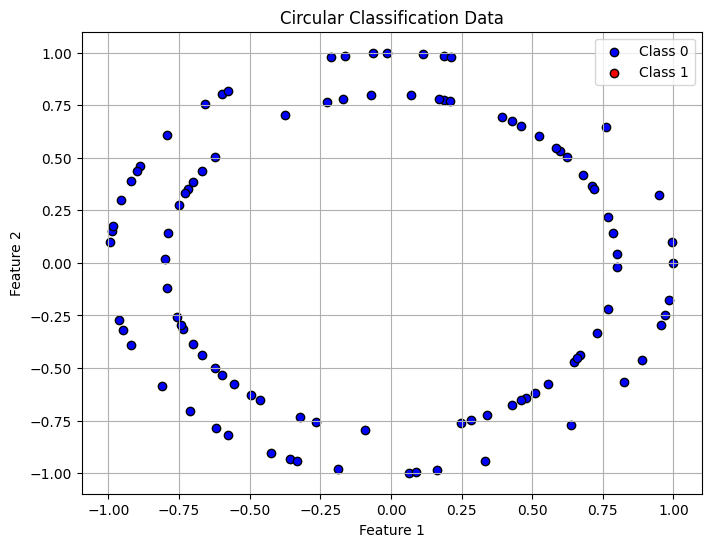

In [4]:
circularX, circulary = datasets.make_circles(n_samples = 500, random_state = 42)

circularX_train, circularX_test, circulary_train, circulary_test = train_test_split(circularX, circulary, random_state = 42, train_size = 0.8)


circularNN = NeuralNetwork()

circularNN.add_input(2)
circularNN.add_dense(10)
circularNN.add_dense(10)
circularNN.add_output(1)

circularNN.train(circularX_train, circulary_train.reshape(-1, 1), epoches = 100000, learn_rate = 0.001, print_information = True)
pred = circularNN.predict(circularX_test)

pred_binary = (pred > 0.5).astype(int)


plt.figure(figsize=(8, 6))
plt.scatter(circularX_test[pred_binary.flatten() == 0][:, 0], circularX_test[pred_binary.flatten() == 0][:, 1], color='blue', label='Class 0', edgecolor='k')
plt.scatter(circularX_test[pred_binary.flatten() == 1][:, 0], circularX_test[pred_binary.flatten() == 1][:, 1], color='red', label='Class 1', edgecolor='k')
plt.title('Circular Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

